In [11]:
import pandas
import geopandas
import matplotlib.pyplot as plt

In [33]:
shape = geopandas.read_parquet("../_products/cases/bronchiolitis_and_tracts.parquet")

In [34]:
shape.head(3)

,toponimo_i,casos,totalpobl,tasa_casos,geometry
0,321973,0,1086.0,0.000000,"POLYGON ((3578785.448 5264948.990, 3578901.180..."
1,321976,0,712.0,0.000000,"POLYGON ((3578244.850 5265535.078, 3578270.165..."
2,319120,1,693.0,14.430014,"POLYGON ((3578569.532 5266020.406, 3578696.315..."


In [35]:
# add nbi values
data = pandas.merge(
    shape,
    pandas.read_parquet("../_products/get/nbi.parquet"),
    on="toponimo_i")

In [36]:
data.head()

,toponimo_i,casos,totalpobl,tasa_casos,geometry,nbi
0,321973,0,1086.0,0.000000,"POLYGON ((3578785.448 5264948.990, 3578901.180...",3.29
1,321976,0,712.0,0.000000,"POLYGON ((3578244.850 5265535.078, 3578270.165...",8.23
2,319120,1,693.0,14.430014,"POLYGON ((3578569.532 5266020.406, 3578696.315...",6.51
3,321977,0,853.0,0.000000,"POLYGON ((3578332.532 5265833.035, 3578334.896...",7.94
4,321978,2,1130.0,17.699115,"POLYGON ((3577646.220 5265939.018, 3577782.398...",11.42


In [37]:
data['totalpobl'].sum()

81218.0

In [38]:
from matplotlib.colors import TwoSlopeNorm

def get_normalized_cbar(vmin, vmax):
    vcenter = (vmax - vmin )/2

    norm = TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)
    # create a normalized colorbar
    cmap = 'RdBu_r'
    cbar = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
    
    return cbar, norm, cmap

In [39]:
# normalize color
vmin_pob, vmax_pob = data['totalpobl'].min(), data['totalpobl'].max()
cbar_pob, norm_pop, cmap_pop = get_normalized_cbar(vmin_pob, vmax_pob)

vmin_nbi, vmax_nbi = data['nbi'].min(), data['nbi'].max()
cbar_nbi, norm_nbi, cmap_nbi = get_normalized_cbar(vmin_nbi, vmax_nbi)

vmin_tasa_casos, vmax_tasa_casos = data['tasa_casos'].min(), data['tasa_casos'].max()
cbar_tasa_casos, norm_tasa_casos, cmap_tasa_casos = get_normalized_cbar(vmin_tasa_casos, vmax_tasa_casos)

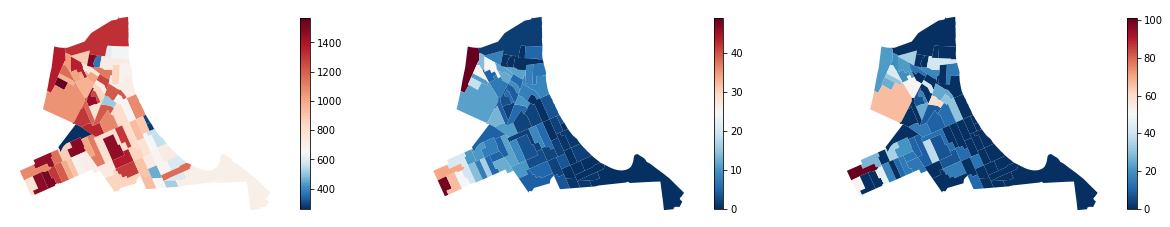

In [42]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21, 7))
# population
data.plot(column='totalpobl', cmap=cmap_pop, norm=norm_pop, legend=False, ax=ax1)
# nbi
data.plot(column='nbi', cmap=cmap_nbi, norm=norm_nbi, legend=False, ax=ax2)
# rates
data.plot(column='tasa_casos', cmap=cmap_tasa_casos, norm=norm_tasa_casos, legend=False, ax=ax3)

ax1.set_axis_off()
ax2.set_axis_off()
ax3.set_axis_off()

# add colorbar
fig.colorbar(cbar_pob, ax=ax1, shrink=.5)
fig.colorbar(cbar_nbi, ax=ax2, shrink=.5)
fig.colorbar(cbar_tasa_casos, ax=ax3, shrink=.5)

plt.show()

In [43]:
# TODO: Decidir una imagen presentación